## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [76]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


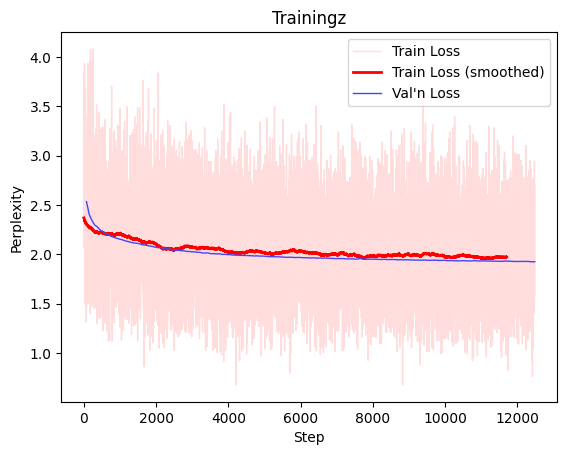

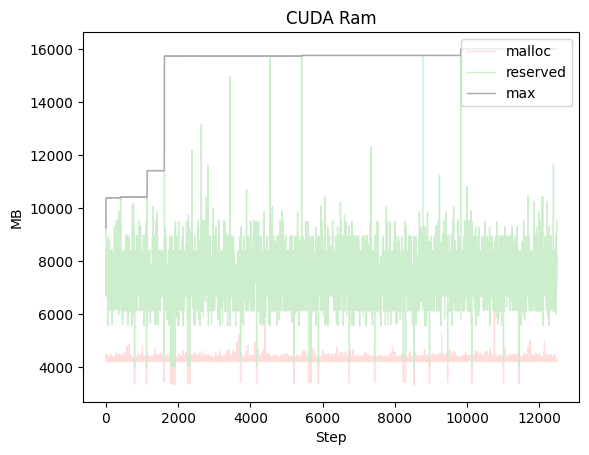

In [77]:
tdat = pd.read_csv('lightning_logs/version_14/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(100, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz


plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()

plt.plot( tdat.traincuda_malloc_mb, label = 'malloc', color='#fdd', linewidth=1)
plt.plot( tdat.traincuda_reserved_mb, label = 'reserved', color='#cec', linewidth=1)
plt.plot( tdat.traincuda_max_reserved_mb, label = 'max', color='#aaa', linewidth=1)

plt.xlabel('Step')
plt.ylabel('MB')
plt.legend(loc='upper right')
plt.title('CUDA Ram')
plt.show()


In [78]:
np.mean(tdat.train_loss[-100:])


1.9806118017556715

In [79]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

74       2.533065
149      2.403535
224      2.343255
299      2.297306
374      2.277513
           ...   
12224    1.927602
12299    1.926803
12374    1.924653
12449    1.925019
12479    1.924050
Name: val_loss, Length: 167, dtype: float64

In [80]:
tdat[-100:]

,train_loss,length,traincuda_malloc_mb,traincuda_reserved_mb,traincuda_max_reserved_mb,epoch,step,val_loss,valcuda_malloc_mb,valcuda_reserved_mb,valcuda_max_reserved_mb
12380,2.472667,29.000000,4261.997559,6714.0,16020.0,0,1221599,NaN,NaN,NaN,NaN
12381,2.138271,26.000000,4249.224121,6680.0,16020.0,0,1221699,NaN,NaN,NaN,NaN
12382,2.758974,30.000000,4265.655273,7238.0,16020.0,0,1221799,NaN,NaN,NaN,NaN
12383,1.976248,23.000000,4234.476562,11638.0,16020.0,0,1221899,NaN,NaN,NaN,NaN
12384,2.212107,29.000000,4262.187012,11640.0,16020.0,0,1221999,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12475,2.186318,22.000000,4231.822266,8342.0,16020.0,0,1230999,NaN,NaN,NaN,NaN
12476,2.501232,23.000000,4235.226562,8940.0,16020.0,0,1231099,NaN,NaN,NaN,NaN
12477,1.811646,33.000000,4277.307129,9526.0,16020.0,0,1231199,NaN,NaN,NaN,NaN
12478,2.702929,24.000000,4240.505859,9526.0,16020.0,0,1231232,NaN,NaN,NaN,NaN


In [81]:
np.mean(tdat.length)

34.93530596372409